In [3]:
from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment

In [4]:
def note_position(a):
    notes = {'A':9, 'A#':10, 'B':11, 'C':0, 'C#':1, 'D':2, 
             'D#':3, 'E':4, 'F':5, 'F#':6, 'G':7, 'G#':8}
    note = notes[a[:-1]]
    scale = int(a[-1])
    return note + scale*12

def note_distance(a, b):
    return note_position(b)-note_position(a)

def frequencies(start, stop, A4=440):
    import numpy as np
    a = 2**(1/12)
    return a ** np.arange(note_distance('A4', start), note_distance('A4', stop)) * A4

def note_names(start, stop):
    notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
    
    note = notes.index(start[:-1])
    scale = int(start[-1])
    
    stop_note = notes.index(stop[:-1])
    stop_scale = int(stop[-1])
    
    output = []
    
    while scale < stop_scale or (scale == stop_scale and note < stop_note):
        output.append(notes[note] + str(scale))
        note += 1
        if note >= len(notes):
            note = 0
            scale += 1
        
    return output

In [5]:
# Load the sound file
fs_bells, wav_bells = wavfile.read('../samples/HandBells.wav')
fs_guitar, wav_guitar = wavfile.read('../samples/Guitar.wav')
fs_piano, wav_piano = wavfile.read('../samples/Piano.wav')

In [6]:
wav_bells = wav_bells.astype(np.double)
wav_guitar = wav_guitar.astype(np.double)
wav_piano = wav_piano.astype(np.double)

In [7]:
freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=16384)
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=16384)
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=16384)

In [8]:
arg_sort = np.argsort(spectrogram_piano, axis=0)
arg_sort2 = np.argsort(spectrogram_piano, axis=0)

In [7]:
arg_sort2.sort()

In [31]:
for a in arg_sort[0]:
    print(freq_piano[a])

9270.0439453125
10521.661376953125
12233.551025390625
12521.5576171875
12742.27294921875
12785.33935546875
13302.13623046875
13619.7509765625
16217.193603515625
16768.98193359375
16903.564453125
17466.119384765625
18712.353515625
19188.775634765625
19229.150390625
19624.822998046875
19686.73095703125
19867.071533203125
20222.369384765625
20303.118896484375
20844.140625
20906.048583984375
21107.92236328125
21177.9052734375
21234.429931640625
21441.68701171875
21514.361572265625
21546.661376953125
21683.935546875
21702.777099609375
21732.38525390625


In [32]:
for a in arg_sort2[0]:
    print(freq_piano[a])

20906.048583984375
21441.68701171875
19188.775634765625
17466.119384765625
13302.13623046875
20222.369384765625
10521.661376953125
20303.118896484375
21732.38525390625
19229.150390625
21107.92236328125
9270.0439453125
12785.33935546875
16903.564453125
19686.73095703125
12521.5576171875
16768.98193359375
21546.661376953125
19867.071533203125
21683.935546875
19624.822998046875
21234.429931640625
21702.777099609375
13619.7509765625
12233.551025390625
20844.140625
21177.9052734375
21514.361572265625
18712.353515625
16217.193603515625
12742.27294921875


In [15]:
note_freq = frequencies('C0', 'C8')
diff = []
for i in range(len(note_freq)-1):
    diff.append(abs(note_freq[i] - note_freq[i+1]))

In [100]:
note_range = []
for i in range(len(note_freq)-1):
    note_range.append((note_freq[i] - diff[i]/3, note_freq[i] + diff[i]/3))
note_range = np.asarray(note_range)

In [101]:
note_range

array([[  16.0274923 ,   16.67570337],
       [  16.98053658,   17.66729229],
       [  17.99025183,   18.71784416],
       [  19.06000787,   19.83086509],
       [  20.19337492,   21.01006969],
       [  21.39413548,   22.25939345],
       [  22.66629698,   23.58300586],
       [  24.01410513,   24.98532437],
       [  25.44205813,   26.47102907],
       [  26.95492164,   28.04507836],
       [  28.55774468,   29.71272551],
       [  30.25587655,   31.47953611],
       [  32.05498459,   33.35140673],
       [  33.96107317,   35.33458458],
       [  35.98050366,   37.43568831],
       [  38.12001575,   39.66173018],
       [  40.38674984,   42.02013939],
       [  42.78827096,   44.5187869 ],
       [  45.33259395,   47.16601173],
       [  48.02821026,   49.97064873],
       [  50.88411626,   52.94205813],
       [  53.90984327,   56.09015673],
       [  57.11548937,   59.42545101],
       [  60.5117531 ,   62.95907221],
       [  64.10996919,   66.70281346],
       [  67.92214633,   

In [110]:
note_range.shape

(95, 2)

In [115]:
note_freq[None,:-1].repeat(freq_piano.shape, 0)[
    ((freq_piano[:,None]>note_range[None,:,0])&(freq_piano[:,None]<note_range[None,:,1]))
]

array([  16.35159783,   21.82676446,   24.49971475,   29.13523509,
         32.70319566,   34.64782887,   43.65352893,   46.24930284,
         48.9994295 ,   51.9130872 ,   58.27047019,   61.73541266,
         65.40639133,   69.29565774,   73.41619198,   77.78174593,
         82.40688923,   87.30705786,   87.30705786,   92.49860568,
         92.49860568,   97.998859  ,   97.998859  ,  103.82617439,
        103.82617439,  110.        ,  116.54094038,  116.54094038,
        123.47082531,  123.47082531,  130.81278265,  130.81278265,
        138.59131549,  138.59131549,  146.83238396,  146.83238396,
        155.56349186,  155.56349186,  164.81377846,  164.81377846,
        174.61411572,  174.61411572,  174.61411572,  184.99721136,
        184.99721136,  184.99721136,  195.99771799,  195.99771799,
        195.99771799,  207.65234879,  207.65234879,  207.65234879,
        220.        ,  220.        ,  220.        ,  233.08188076,
        233.08188076,  233.08188076,  233.08188076,  246.94165

In [116]:
spectrogram_piano.shape

(8193, 31)

In [118]:
((freq_piano[:,None]>note_range[None,:,0])&(freq_piano[:,None]<note_range[None,:,1])).shape

(8193, 95)

Text(0.5,0,'Intensity')

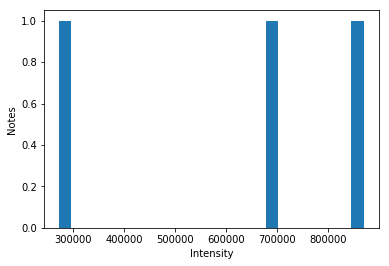

In [18]:
plt.hist(spectrogram_piano[:,0][spectrogram_piano[:,0]>173813.8398005], 25)
plt.ylabel('Notes')
plt.xlabel('Intensity')

In [16]:
spectrogram_piano[:,0].max() / 5

173813.83980050002

In [18]:
correction = []
for i in range(len(note_freq)-1):
    correction.append((note_range[i], note_freq[i]))

In [21]:
perfect = []
add = True
for a in range(len(arg_sort)-1):
    add = True
    for c in correction:
        ra = c[0]
        cur_note = freq_piano[arg_sort[a][0]]
        if (cur_note > ra[0] and cur_note < ra[1]):
            perfect.append(c[1])
            add = False
            break
    if add == True:
        perfect.append(cur_note)

In [22]:
arg_sort_p = np.argsort(perfect, axis=0)

In [24]:
plt.figure(figsize=(16,16))
plt.plot(perfect[spectrogram_piano.argmax(axis=0)], 'o-')
plt.plot(perfect[arg_sort_p[-2]], 'o')
#plt.plot(freq_guitar[arg_sort[-3]], 'o')
plt.gca().set_yscale("log")
plt.yticks(frequencies('C0', 'G#7'),
           note_names('C0', 'G#7'))
plt.gca().grid(True)
plt.gca().set_aspect('auto')


TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 1152x1152 with 0 Axes>

In [104]:
perfect

[0.0,
 2.691650390625,
 5.38330078125,
 8.074951171875,
 10.7666015625,
 13.458251953125,
 16.351597831287375,
 18.35404799483793,
 21.826764464562697,
 24.49971474885928,
 27.499999999999947,
 29.13523509488056,
 32.703195662574764,
 34.647828872108946,
 36.708095989675876,
 41.20344461410867,
 43.65352892912541,
 46.24930283895422,
 48.99942949771858,
 51.913087197493056,
 54.999999999999915,
 54.999999999999915,
 58.270470189761156,
 61.73541265701542,
 65.40639132514957,
 65.40639132514957,
 69.29565774421793,
 73.4161919793518,
 73.4161919793518,
 77.78174593052012,
 82.40688922821738,
 82.40688922821738,
 87.30705785825087,
 87.30705785825087,
 92.4986056779085,
 92.4986056779085,
 97.99885899543722,
 97.99885899543722,
 103.82617439498618,
 103.82617439498618,
 109.99999999999989,
 109.99999999999989,
 109.99999999999989,
 116.54094037952237,
 116.54094037952237,
 123.4708253140309,
 123.4708253140309,
 123.4708253140309,
 130.8127826502992,
 130.8127826502992,
 130.812782650299

In [106]:
spectrogram_piano

array([[3.29005080e+00, 1.30787022e+00, 5.84442941e+00, ...,
        1.86698988e-04, 7.96102113e-06, 2.43050918e-05],
       [1.86788840e+00, 2.43809701e-02, 9.10188942e-02, ...,
        9.66516039e-06, 5.31873035e-06, 2.19264816e-03],
       [6.24222229e+00, 3.80219058e-01, 1.01977033e-01, ...,
        3.01780480e-05, 2.07226478e-05, 8.41688834e-05],
       ...,
       [1.25519438e-05, 1.12262450e-06, 4.41811263e-06, ...,
        3.42504106e-06, 5.71305930e-07, 3.18496506e-08],
       [1.81913942e-05, 5.41060771e-08, 6.11093266e-06, ...,
        2.97327968e-06, 1.27604615e-07, 1.15687069e-07],
       [1.64307080e-06, 1.34653956e-05, 4.46436146e-07, ...,
        1.66795612e-06, 2.17114560e-07, 6.78769844e-08]])

In [38]:
correction

[((16.02749229636501, 16.67570336620974), 16.351597831287375),
 ((16.98053658312664, 17.667292288982285), 17.323914436054462),
 ((17.99025183224057, 18.71784415743529), 18.35404799483793),
 ((19.060007874488573, 19.83086509077145), 19.44543648263001),
 ((20.1933749212182, 21.010069692890447), 20.601722307054324),
 ((21.394135479591228, 22.259393449534166), 21.826764464562697),
 ((22.666296976349706, 23.583005862604494), 23.1246514194771),
 ((24.0141051322302, 24.98532436548836), 24.49971474885928),
 ((25.44205813166204, 26.471029065830994), 25.956543598746517),
 ((26.954921635039742, 28.04507836496015), 27.499999999999947),
 ((28.557744683671515, 29.712725506089605), 29.13523509488056),
 ((30.255876550485343, 31.479536106530052), 30.867706328507698),
 ((32.05498459273004, 33.35140673241949), 32.703195662574764),
 ((33.9610731662533, 35.33458457796459), 34.647828872108946),
 ((35.980503664481155, 37.435688314870596), 36.708095989675876),
 ((38.12001574897717, 39.66173018154292), 38.8908

In [25]:
note_range

[(16.02749229636501, 16.67570336620974),
 (16.98053658312664, 17.667292288982285),
 (17.99025183224057, 18.71784415743529),
 (19.060007874488573, 19.83086509077145),
 (20.1933749212182, 21.010069692890447),
 (21.394135479591228, 22.259393449534166),
 (22.666296976349706, 23.583005862604494),
 (24.0141051322302, 24.98532436548836),
 (25.44205813166204, 26.471029065830994),
 (26.954921635039742, 28.04507836496015),
 (28.557744683671515, 29.712725506089605),
 (30.255876550485343, 31.479536106530052),
 (32.05498459273004, 33.35140673241949),
 (33.9610731662533, 35.33458457796459),
 (35.980503664481155, 37.435688314870596),
 (38.12001574897717, 39.66173018154292),
 (40.38674984243642, 42.020139385780915),
 (42.78827095918247, 44.518786899068346),
 (45.33259395269943, 47.16601172520901),
 (48.02821026446042, 49.97064873097674),
 (50.8841162633241, 52.94205813166201),
 (53.9098432700795, 56.09015672992033),
 (57.115489367343066, 59.425451012179245),
 (60.5117531009707, 62.95907221306013),
 (6

In [68]:
new_notes = []
for arg in arg_sort:
#     for rg in arg:
    rg = arg[0]
    for rang in correction:
        not_rang = rang[0]
        cor_note = rang[1]
        cur_note = freq_piano[rg]
        if (cur_note > not_rang[0] and cur_note < not_rang[1]):
            new_notes.append(cor_note)
            break
new_notes = np.array(new_notes)

In [64]:
len(new_notes)

983

In [65]:
len(arg_sort)

8193

In [66]:
len(correction)

95

In [50]:
spectrogram_piano.argmax(axis=0)

array([195, 123, 246, 260, 329, 293, 261, 247, 247, 261, 260, 293, 195,
       219, 247, 246, 195, 246, 219, 293, 329, 293, 195, 130, 329, 329,
       246, 246,  97,  97,  97])

In [61]:
arg_sort_p = np.argsort(new_notes, axis=0)

In [71]:
arg_sort_p

array([567, 592, 400, 528, 354, 339, 132, 572, 587, 398, 694, 600, 530,
       670, 635, 650, 781, 718, 792, 843, 831, 637, 610, 680, 751, 825,
       719, 735, 928, 897, 970, 964, 704, 585, 804, 798, 692, 659, 974,
       975, 892, 747, 874, 877, 902, 850, 945, 972, 980, 935, 871, 901,
       809, 749, 248, 745, 675,   2, 756, 666, 800, 737, 824, 978, 976,
       957, 946, 875, 860, 870, 862, 913, 739, 671, 774, 732, 601, 840,
       728, 731, 868, 973, 981, 960, 959, 764, 701, 557, 657, 653, 598,
       869, 791, 823, 634, 855, 969, 979, 916, 647, 958, 455, 797, 766,
       435, 844, 660, 864, 720, 681, 389, 497, 746, 410, 620, 651, 596,
       677, 768, 539, 734, 963, 786, 859, 736, 917, 941, 910, 891, 982,
       939, 948, 949, 952, 977, 966, 971, 705, 584, 672, 674, 223, 504,
       883, 595, 819, 962, 645, 317, 896, 905, 773, 777, 961, 574, 421,
       385, 476, 417, 413, 642, 568, 433, 412, 795, 947, 703, 821, 933,
       899, 818, 863, 944, 474, 506, 427, 383, 563, 407, 545, 45

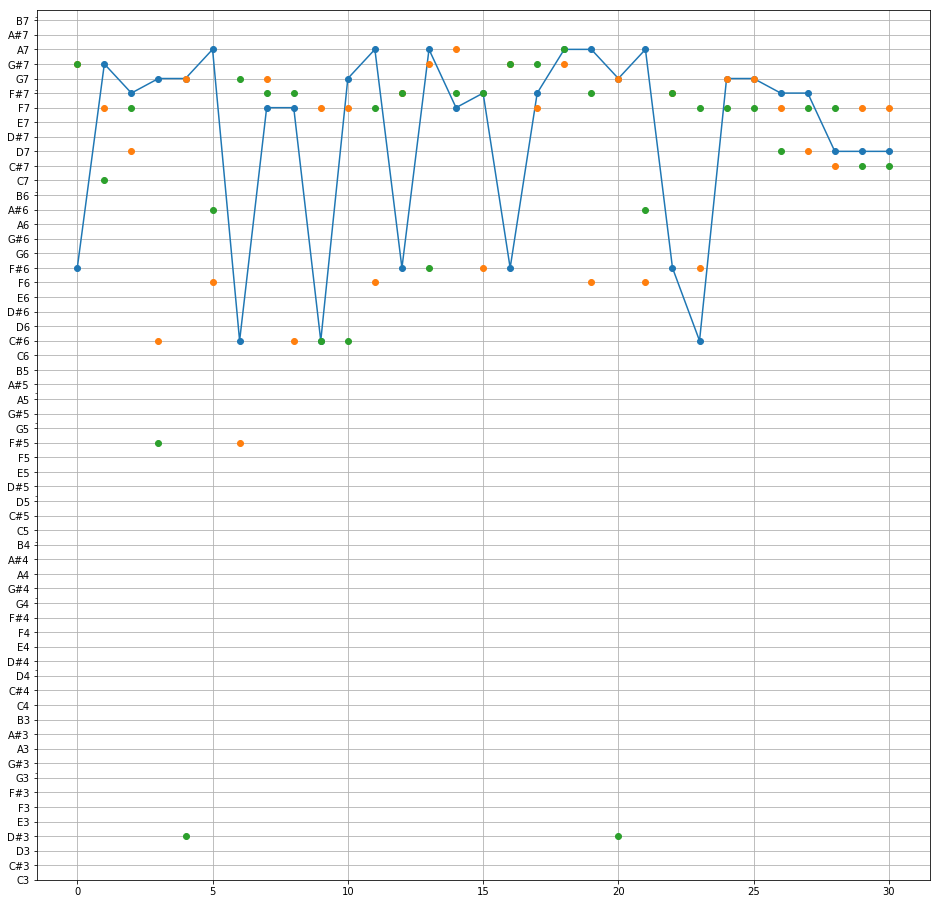

In [78]:
plt.figure(figsize=(16,16))
plt.plot(new_notes[spectrogram_piano.argmax(axis=0)], 'o-')
# plt.plot(new_notes, 'o-')#[spectrogram_piano.argmax(axis=0)], 'o-')
plt.plot(new_notes[arg_sort[-2]], 'o')
plt.plot(new_notes[arg_sort[-3]], 'o')
plt.gca().set_yscale("log")
plt.yticks(frequencies('C3', 'C8'),
           note_names('C3', 'C8'))
plt.gca().grid(True)
plt.gca().set_aspect('auto')


In [53]:
np.array(new_notes)

array([2793.82585146, 3520.        ,  233.08188076, 3135.96348785,
       2217.46104781, 3322.43758064, 3135.96348785, 3322.43758064,
       2349.31814334, 1108.73052391, 3520.        , 3322.43758064,
       3322.43758064, 3520.        , 3322.43758064, 3322.43758064,
       3322.43758064, 3520.        , 3135.96348785, 2217.46104781,
       3322.43758064, 3520.        , 3520.        , 3322.43758064,
       3322.43758064, 3322.43758064, 2489.01586978, 3322.43758064,
       2217.46104781, 2349.31814334, 1479.97769085, 2349.31814334,
       2349.31814334, 3520.        , 3322.43758064, 3322.43758064,
       3135.96348785, 3322.43758064, 2217.46104781, 3322.43758064,
       3520.        , 3520.        , 3322.43758064, 3520.        ,
       3322.43758064, 3322.43758064, 3322.43758064, 3520.        ,
       3729.31009214, 2217.46104781, 3322.43758064, 3135.96348785,
       2093.0045224 , 2349.31814334, 2217.46104781, 2959.95538169,
       2093.0045224 , 3520.        , 2489.01586978, 3520.     

In [89]:
def make_corrections(spec, freq):
    arg_sort = np.argsort(spec, axis=0)
    note_freq = frequencies('C0', 'C8')
    
    diff = []
    for i in range(len(note_freq)-1):
        diff.append(abs(note_freq[i] - note_freq[i+1]))
        
    note_range = []
    for i in range(len(note_freq)-1):
        note_range.append((note_freq[i] - diff[i]/3, note_freq[i] + diff[i]/3))
        
    correction = []
    for i in range(len(note_freq)-1):
        correction.append((note_range[i], note_freq[i]))
        
    new_notes = []
    for arg in arg_sort:
        rg = arg[0]
        for rang in correction:
            not_rang = rang[0]
            cor_note = rang[1]
            cur_note = freq[rg]
            if (cur_note > not_rang[0] and cur_note < not_rang[1]):
                new_notes.append(cor_note)
                break
    new_notes = np.array(new_notes)
    return new_notes

#     plt.figure(figsize=(16,16))
#     plt.plot(new_notes[spec.argmax(axis=0)], 'o-')

# #     plt.plot(new_notes[arg_sort[-2]], 'o')
# #     plt.plot(new_notes[arg_sort[-3]], 'o')

#     plt.gca().set_yscale("log")
#     plt.yticks(frequencies('C3', 'C8'),
#                note_names('C3', 'C8'))
#     plt.gca().grid(True)
#     plt.gca().set_aspect('auto')

In [159]:
def please_work(spec, freq):
    note_freq = frequencies('C0', 'C8')
    rows = []
    for i in range(1, len(note_freq)-1):
        low  = note_freq[i] - (1/2)*(note_freq[i]-note_freq[i-1])
        high = note_freq[i] + (1/2)*(note_freq[i+1]-note_freq[i])
        ind  = (freq>=low)&(freq<=high)
        row  = spec[ind,:].sum(0) # Average it
        if (ind.sum() > 0):
             row /= ind.sum()
        rows.append(row)
    data = np.asarray(rows)
    return data, note_freq[1:-1]

In [160]:
d, nf = please_work(spectrogram_piano, freq_piano)

In [163]:
d

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.39241793e+00, 1.46993302e+01, 2.18899233e+01, ...,
        2.29007774e-03, 5.59976908e-05, 7.39126786e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.02883709e+01, 4.84128621e+01, 3.87991251e+00, ...,
        1.86017630e-05, 1.20213544e-05, 1.86565481e-06],
       [5.88933223e+00, 1.07834909e+00, 2.82706030e+01, ...,
        6.17320242e-06, 1.11628722e-05, 1.57058955e-06],
       [2.53591652e+01, 1.06404012e+00, 6.51268193e-01, ...,
        6.90024232e-06, 9.85338799e-06, 1.55674249e-06]])

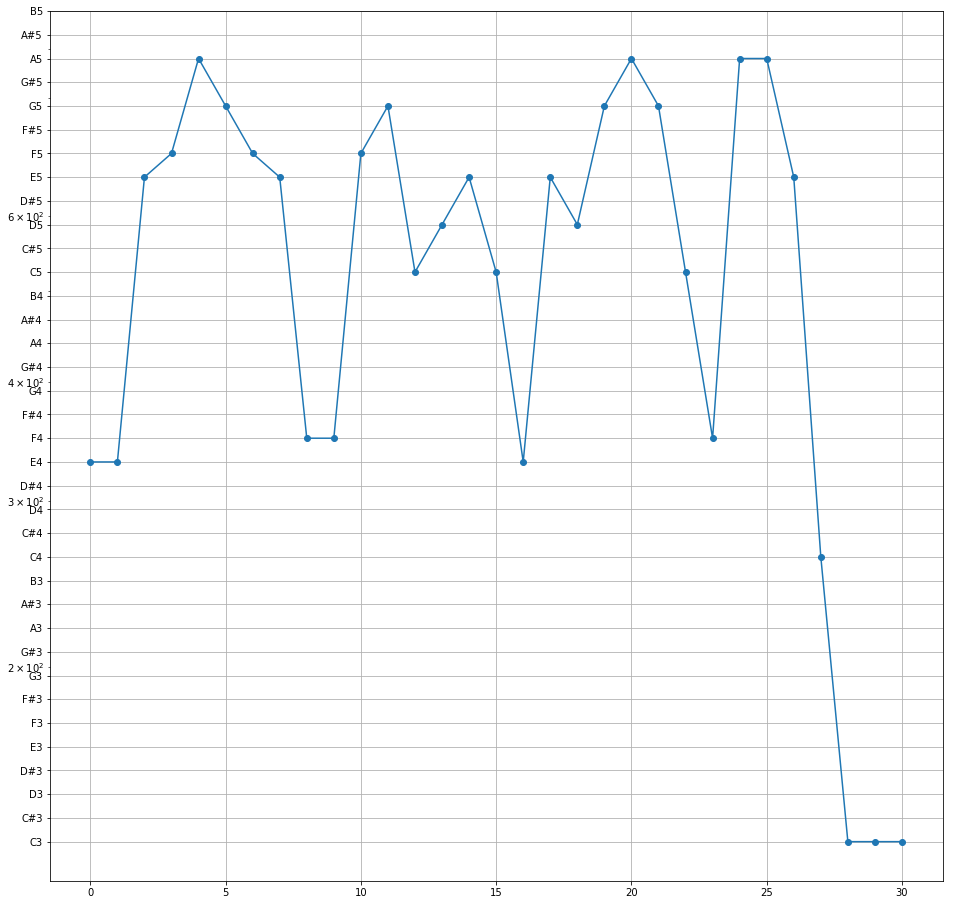

In [166]:
plt.figure(figsize=(16,16))
plt.plot(nf[d.argmax(axis=0)], 'o-')
# plt.plot(nf[arg_sort_guitar[-2]], 'o')
plt.gca().set_yscale("log")
plt.yticks(frequencies('C3', 'C6'),
           note_names('C3', 'C6'))
plt.gca().grid(True)
plt.gca().set_aspect('auto')

In [167]:
d_guitar, nf_guitar = please_work(spectrogram_guitar, freq_guitar)

In [169]:
guitar_asort = np.argsort(d_guitar, axis=0)

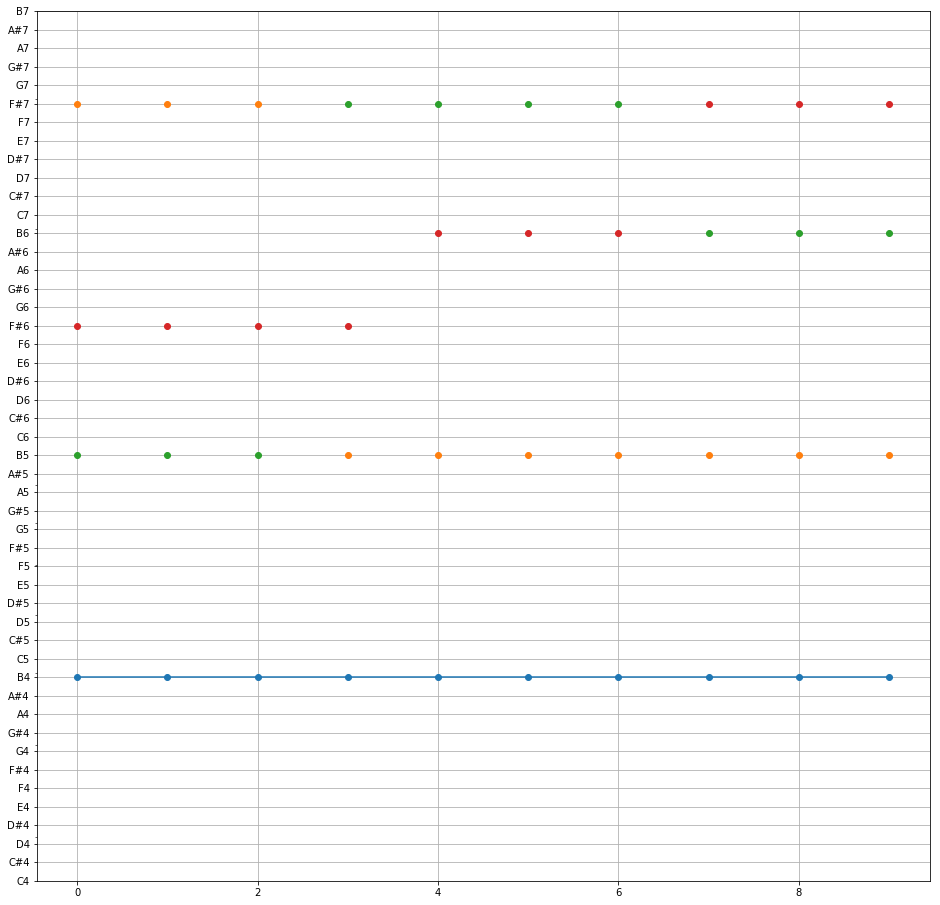

In [178]:
plt.figure(figsize=(16,16))
plt.plot(nf_guitar[d_guitar.argmax(axis=0)][1:11], 'o-')
plt.plot(nf_guitar[guitar_asort[-2]][1:11], 'o')
plt.plot(nf_guitar[guitar_asort[-3]][1:11], 'o')
plt.plot(nf_guitar[guitar_asort[-4]][1:11], 'o')
#plt.plot(nf_guitar[guitar_asort[-5]][1:11], 'o')
# 
plt.gca().set_yscale("log")
plt.yticks(frequencies('C4', 'C8'),
           note_names('C4', 'C8'))
plt.gca().grid(True)
plt.gca().set_aspect('auto')

In [129]:
guitar_notes = make_corrections(spectrogram_guitar, freq_guitar)
arg_sort_guitar = np.argsort(spectrogram_guitar, axis=0)

In [131]:
spectrogram_guitar.shape

(8193, 14)

In [133]:
arg_sort_guitar[-2]

array([  56, 1115, 1115, 1115, 1115, 1115, 1115, 1115, 1115, 1115, 1115,
        187,    3,    4])

In [135]:
guitar_notes

array([ 554.36526195, 2217.46104781,  987.76660251, 1108.73052391,
       1864.65504607, 1975.53320502, 2637.0204553 ,  587.32953583,
        622.25396744,  391.99543598, 2093.0045224 , 1567.98174393,
       2637.0204553 ,  880.        , 2093.0045224 , 3322.43758064,
        391.99543598, 2489.01586978,  830.60939516,  554.36526195,
       1479.97769085,  329.62755691, 2349.31814334,  830.60939516,
       1046.5022612 , 1864.65504607, 2489.01586978, 1760.        ,
       2959.95538169,  783.99087196,  440.        , 1396.91292573,
        311.12698372, 2637.0204553 , 2637.0204553 , 1396.91292573,
       1108.73052391, 1567.98174393, 3135.96348785, 2217.46104781,
        880.        ,   97.998859  , 1975.53320502, 1396.91292573,
       1760.        , 2489.01586978,  349.22823143, 1108.73052391,
       2637.0204553 , 2093.0045224 ,  311.12698372, 2217.46104781,
       3322.43758064, 2959.95538169,  987.76660251, 1396.91292573,
       1975.53320502, 1108.73052391,  659.25511383,  880.     

IndexError: index 1115 is out of bounds for axis 1 with size 983

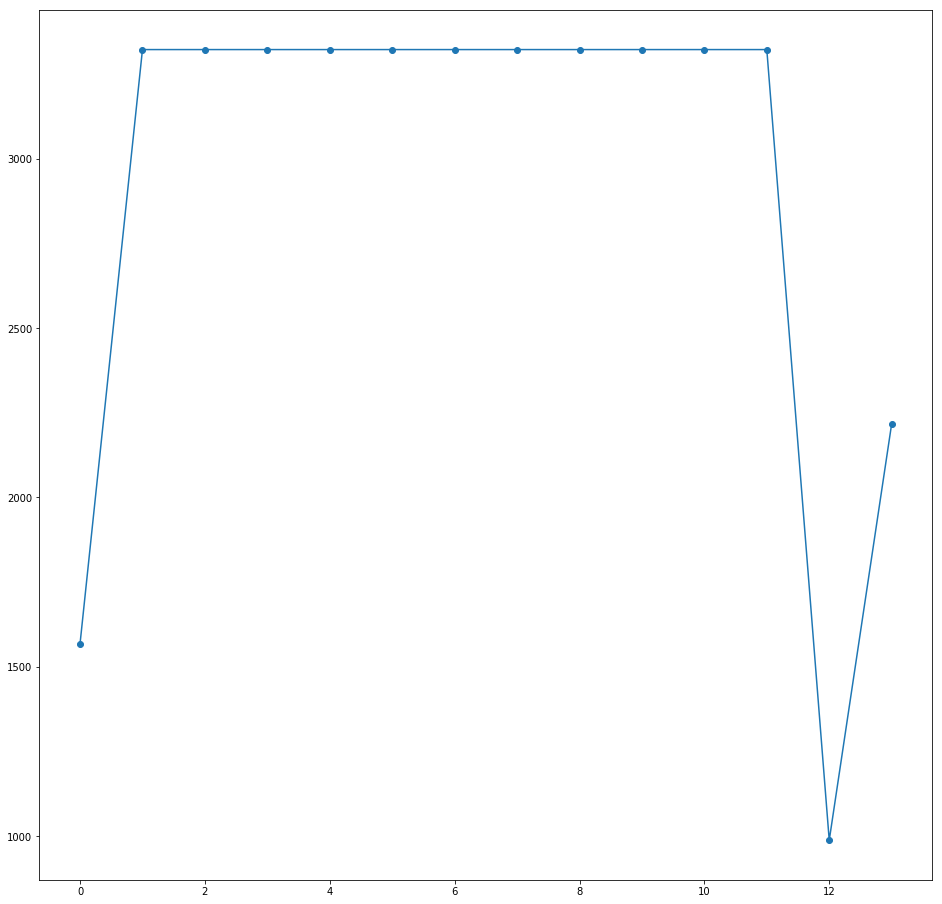

In [130]:
plt.figure(figsize=(16,16))
plt.plot(guitar_notes[spectrogram_guitar.argmax(axis=0)], 'o-')
plt.plot(guitar_notes[arg_sort_guitar[-2]], 'o')
plt.gca().set_yscale("log")
plt.yticks(frequencies('C5', 'C8'),
           note_names('C5', 'C8'))
plt.gca().grid(True)
plt.gca().set_aspect('auto')

In [98]:
bell_notes = make_corrections(spectrogram_bells, freq_bells)

In [99]:
plt.figure(figsize=(16,16))
plt.plot(bell_notes[spectrogram_bells.argmax(axis=0)], 'o-')
plt.gca().set_yscale("log")
plt.yticks(frequencies('C5', 'C8'),
           note_names('C5', 'C8'))
plt.gca().grid(True)
plt.gca().set_aspect('auto')

IndexError: index 1456 is out of bounds for axis 1 with size 983

<Figure size 1152x1152 with 0 Axes>